<a href="https://colab.research.google.com/github/spribylova/Python_Text_Sentiment/blob/main/sentiment_transformers_sentintanalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install kaggle to use kaggle sample data sets
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle

In [ ]:
# install the main libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# download lexicon to work with pretrained text data
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# import e.g. sentiment analyzer to categorise reviews
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

In [ ]:
# use e.g. the available Hotel_Reviews.csv file, download from kaggle or from https://github.com/spribylova/Python_Hotels
# data = pd.read_csv("Hotel_Reviews.csv")

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/spribylova/Python_Text_Sentiment/main/Hotel_Reviews.csv"
data = pd.read_csv(url)
data

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35907,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-20T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Best of the Best!!!! My family and I stayed in...,Amazing time (both times!!),Charlotte,Chelsa K.,NC
35908,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-12T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Amazing Vacation in Beautiful Cabin We stayed ...,Amazing time (both times!!),Charlotte,Heather D.,NC
35909,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2015-11-03T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,My husband and I stayed at Tree Tops which is ...,Amazing time (both times!!),Charlotte,Carol W.,NC
35910,3747 29th St S E,"Hotels-Apartment,Corporate Lodging,Hotels,Lodging",Grand Rapids,US,42.909480,-85.573590,Extended Stay America Grand Rapids - Kentwood,49512,MI,NaN,2015-12-01T19:40:54Z,NaN,NaN,0.0,to share your opinion of this businesswith YP ...,NaN,NaN,write a review,NaN


In [ ]:
# the sample csv file only contains US country
data["country"].unique()

array(['US'], dtype=object)

In [ ]:
# there is many US unique hotel names in the file 
data["name"].unique()

array(['Hotel Russo Palace', 'Americas Best Value Inn', 'Intermezzo',
       'Studio 6', 'Little Paradise Hotel', 'Comfort Suites',
       'Thunderbird Executive Inn and Conference Center',
       'Little Belt Inn Neihart',
       'Hawthorn Suites By Wyndham Livermore Wine Country',
       'Fairfield Inn By Marriott Binghamton', 'Howard Johnson',
       'La Quinta', 'Days Inn El Reno Ok', 'Gresham Area Hotels',
       'Berney Fly Bed and Breakfast', 'Polynesian Plaza',
       'Hotel Vier Jahreszeiten KÜhlungsborn', 'The Point',
       'The Houstonian Hotel', 'Best Western Plus Waterville Grand Hotel',
       'The Amble Inn', 'Howard Johnson Inn Columbia',
       'Osage Village Inn', 'Super 8 Columbia Dwntwn Sc',
       'The Kingsport Inn',
       'Azul Beach Hotel By Karisma Gourmet Inclusive', 'Red Roof Inn',
       'Ocean Breeze Motel Apts', 'Days Inn Branson / Near The Strip',
       'Country Lodge Motel', 'The Inn @ St. Botolph', 'Quality Inn',
       'Comfort Suites Southport', 'R

In [ ]:
# see the unique values in rating column
data["reviews.rating"].unique()

array([ 4. ,  5. ,  3. ,  1. ,  2. ,  0. ,  4.1,  nan,  4.9,  4.8,  3.4,
        2.4,  3.1,  3.2,  3.3,  9.6, 10. ,  8.3,  8.8,  9.2,  7.5,  7.9,
        7.1,  3.8,  5.8,  6.7,  6.3,  4.2,  4.5,  3.9,  1.3,  4.3,  4.7,
        2.8,  4.4,  1.5,  4.6,  3.7,  5.4,  2.5,  6. ,  2.9,  7. ,  9.5])

In [ ]:
# fill the null reviews of the Hotels with 0
data['reviews.rating']=data['reviews.rating'].fillna(0)

In [ ]:
# create a range of 5 maximum review numbers, all values above 5 are equal to 5
for i in range(0,len(data)):
   if(data['reviews.rating'].loc[i] > 5):
       temp = data['reviews.rating'].loc[i]
       newtemp = (temp/10)*5
       data.at[i,'reviews.rating'] = newtemp

In [ ]:
# see the number of reviews for each rating number
ratings = data["reviews.rating"].value_counts()
numbers = ratings.index
quantity = ratings.values
ratings

5.00    12772
4.00     9755
3.00     5709
1.00     3068
2.00     2979
0.00     1199
4.80       78
4.60       56
4.40       30
4.30       26
4.15       25
3.75       24
3.95       24
4.20       22
3.40       17
4.10       14
3.15       14
4.50       13
3.55       13
3.35       12
2.70        9
3.10        7
2.90        7
4.70        6
3.30        6
4.90        6
2.40        4
3.80        3
2.50        3
3.20        2
3.90        2
3.70        2
1.30        1
2.80        1
1.50        1
3.50        1
4.75        1
Name: reviews.rating, dtype: int64

In [ ]:
# round decimal places in rating and sort output by rating level
ratings=data['reviews.rating'].round(0).value_counts()[[5,4,3,2,1]]
ratings

5    12919
4     9954
3     5784
2     2987
1     3069
Name: reviews.rating, dtype: int64

In [ ]:
# create indexes from rating value and counts
numbers = ratings.index
quantity = ratings.values

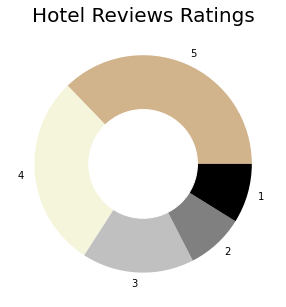

In [ ]:
# assign color to each rating and revise the pie chart to see the share of rating values 
# the majority of people is giving review 5, only small share of people was not satisfied
custom_colors = ["tan", "beige", 'silver', "grey", "black"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Hotel Reviews Ratings", fontsize=20)
plt.show()

In [ ]:
# you can use various libraries to work with reviews: SentimentIntensityAnalyzer, transformers and textblob

In [ ]:
pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 91.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.5 MB/s eta 0:00:00


In [ ]:
# create data frame reviews text, rt. Each review is in a single row.
rt = data[["reviews.text"]]
#rt = str(rt).encode('utf-8')
#rt["reviews.text"] = pd.to_numeric(rt["reviews.text"])
# convert column "reviews.text" to string type
rt = rt.astype({"reviews.text": str})
rt

,reviews.text
0,Pleasant 10 min walk along the sea front to th...
1,Really lovely hotel. Stayed on the very top fl...
2,Ett mycket bra hotell. Det som drog ner betyge...
3,We stayed here for four nights in October. The...
4,We stayed here for four nights in October. The...
...,...
35907,Best of the Best!!!! My family and I stayed in...
35908,Amazing Vacation in Beautiful Cabin We stayed ...
35909,My husband and I stayed at Tree Tops which is ...
35910,to share your opinion of this businesswith YP ...


In [ ]:
# transforers library is using various pretrained models to classify and calculate score
# well known model names are e.g. XLNet, BERT, XLM, RoBERTa, ...
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)
classifier("Really lovely hotel. The best one. Tip top.")

[{'label': '5 stars', 'score': 0.9531726241111755}]

In [ ]:
# use analyzer and download e.g. vader pretrained lexicon (Valence Aware Dictionary for sEntiment Reasoning)
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import pandas as pd

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# revise data types in rt data frame
rt.dtypes

reviews.text    object
dtype: object

In [ ]:
sentiments = SentimentIntensityAnalyzer()

# based on polarity score classify each line of text to positive, negative, neutral and compound
rt["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in rt["reviews.text"]]
rt["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in rt["reviews.text"]]
rt["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in rt["reviews.text"]]
rt['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in rt["reviews.text"]]
rt.head()

,reviews.text,Positive,Negative,Neutral,Compound
0,Pleasant 10 min walk along the sea front to th...,0.252,0.052,0.695,0.8299
1,Really lovely hotel. Stayed on the very top fl...,0.481,0.019,0.500,0.9828
2,Ett mycket bra hotell. Det som drog ner betyge...,0.000,0.000,1.000,0.0000
3,We stayed here for four nights in October. The...,0.289,0.000,0.711,0.9643
4,We stayed here for four nights in October. The...,0.289,0.000,0.711,0.9643


In [ ]:
# classify column Compound
score = rt["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
rt["Sentiment"] = sentiment
rt.head()

,reviews.text,Positive,Negative,Neutral,Compound,Sentiment
0,Pleasant 10 min walk along the sea front to th...,0.252,0.052,0.695,0.8299,Positive
1,Really lovely hotel. Stayed on the very top fl...,0.481,0.019,0.500,0.9828,Positive
2,Ett mycket bra hotell. Det som drog ner betyge...,0.000,0.000,1.000,0.0000,Neutral
3,We stayed here for four nights in October. The...,0.289,0.000,0.711,0.9643,Positive
4,We stayed here for four nights in October. The...,0.289,0.000,0.711,0.9643,Positive


In [ ]:
print(rt["Sentiment"].value_counts())

Positive    26819
Negative     6201
Neutral      2892
Name: Sentiment, dtype: int64


In [ ]:
# save data frame to csv
rt.to_csv("sentiment.csv")